<a href="https://colab.research.google.com/github/vchandraiitk/PokerCardGame/blob/master/Vikas_proctored_exam_bi_cds_b8_madhava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!wget -qq https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

In [28]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
df_car_sales = pd.read_csv("monthly-car-sales.csv")

In [30]:
df_car_sales.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<Axes: xlabel='Month'>

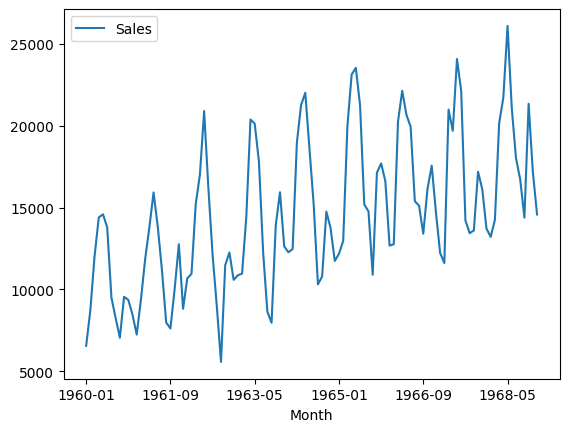

In [31]:
# Question A
# Plot the time series and comment on trend and seasonality

# Convert Month to be an index in the dataframe
df_car_sales.set_index("Month", inplace=True)
df_car_sales.plot()

**Answer A**: As seen from the graph above, there is an upward trend.

Also, the graph seems to have seasonality.

In [32]:
# Question B - To check if the time series is staitonary
# Check if time series is stationary using ADF Test
from statsmodels.tsa.stattools import adfuller

def stationarity(time_series):
    result = adfuller(time_series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Time series is stationary")
        return True
    else:
        print("Time series is non-stationary")
        return False

stationarity(df_car_sales["Sales"])

ADF Statistic: -1.2238127661752858
p-value: 0.6632691049832861
Time series is non-stationary


False

**Answer B**: p-value(0.6632) > 0.05, we cannot reject null hypothesis.
Hence the **Time series is Non-stationary**

In [33]:
# Question C - To make the time series stationary suitably and again test.

# Perform first order differencing and see if the series gets stationary
car_sales_diff = df_car_sales.diff()
car_sales_diff.dropna(inplace=True)
is_stationary = stationarity(car_sales_diff["Sales"])
if is_stationary:
    print("Yes, the time series is stationary")
else:
    print("No, the time series is non-stationary")

ADF Statistic: -6.1997992308006955
p-value: 5.8447525992768446e-08
Time series is stationary
Yes, the time series is stationary


**Answer C**: Applied first-order differencing and re-ran the ADF test. The results confirm that the time series is now stationary.

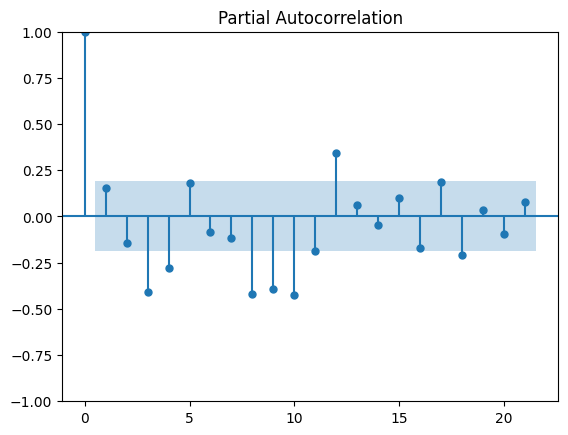

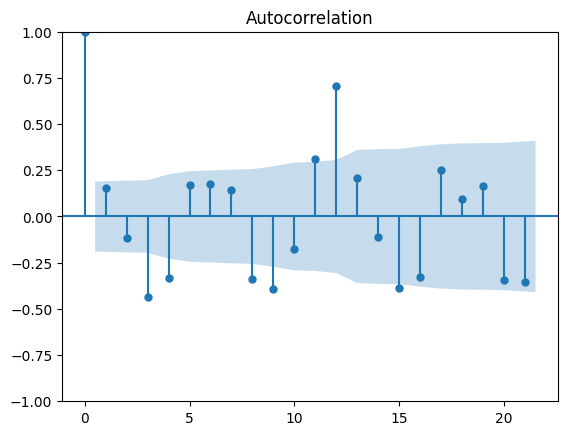

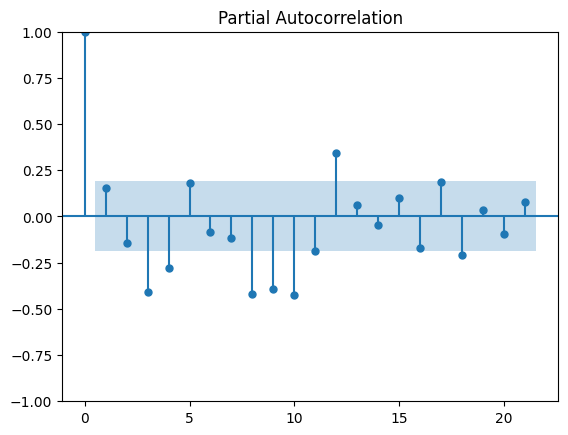

In [34]:
# Question D - Plot ACF and PACF Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(car_sales_diff["Sales"])
plot_pacf(car_sales_diff["Sales"])

**Answer D**: A seasonal pattern is observed with a periodicity of 12 months, indicating a seasonality parameter of **s = 12**.

In [35]:
# Question E - To observe the model for various values of p,d,q,P,D,Q,s
def sarimax_model(log_car_sales,order,seasonal_order):
    model = SARIMAX(log_car_sales,order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

In [36]:
# Option 1: p=2,q=0, P=2, Q=0, d,D =1
order = (2,1,0)
seasonal_order = (2,1,0,12)
model_fit = sarimax_model(df_car_sales["Sales"],order,seasonal_order)
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -842.935
Date:                            Tue, 08 Apr 2025   AIC                           1695.871
Time:                                    02:12:49   BIC                           1708.640
Sample:                                01-01-1960   HQIC                          1701.031
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5575      0.113     -4.953      0.000      -0.778      -0.337
ar.L2         -0.2364      0.127   

In [37]:
# Option 2: p=2,q=1,P=2,Q=1
order = (2,1,0)
seasonal_order = (2,1,0,12)
model_fit = sarimax_model(df_car_sales["Sales"],order,seasonal_order)
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -842.935
Date:                            Tue, 08 Apr 2025   AIC                           1695.871
Time:                                    02:12:50   BIC                           1708.640
Sample:                                01-01-1960   HQIC                          1701.031
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5575      0.113     -4.953      0.000      -0.778      -0.337
ar.L2         -0.2364      0.127   

In [38]:
# Option 3 - p=2,q=2,P=2,Q=2
order = (2,1,2)
seasonal_order = (2,1,2,12)
model_fit = sarimax_model(df_car_sales["Sales"],order,seasonal_order)
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible sta

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -837.163
Date:                            Tue, 08 Apr 2025   AIC                           1692.325
Time:                                    02:12:55   BIC                           1715.310
Sample:                                01-01-1960   HQIC                          1701.613
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7802      0.789      0.989      0.323      -0.767       2.327
ar.L2         -0.0014      0.293   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Answer E**: I would prefer model iii for the following reasons.

    **Model Chosen** : p=2,q=2,P=2,Q=2, d=1, s=12



---
**Reasons to chose are,**

*   This model has the lowest AIC value among the three, suggesting it provides the best fit.

*   The Ljung-Box test yields the highest p-value for this model, indicating that the residuals are largely independent, which supports a better model fit.

*   The p-values for both the AR and MA coefficients are relatively high, allowing us to reject the null hypothesis that these coefficients are zero. This confirms their significance and aligns well with the model interpretation.



